<a href="https://colab.research.google.com/github/Heilley/Grocery_Sales_Prediction/blob/main/GROCERY_SALES_PREDICTION_03_07_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SALES PREDICTION**




**PROJECT BY HALIMA BULAMA-LADAN, 03/03/2022**

This project is on sales prediction at retail grocery stores. It aims at helping Store 
owner's understand the factors that affect the growth of sales and hence maximize their sales returns significantly.

**Data Dictionary, Describing the dataset used in this project**


|**Variable Name**|	**Description**|
| ----- | ----- |
|Item_Identifier|	Unique product ID|
|Item_Weight|	Weight of product|
|Item_Fat_Content|	Whether the product is low fat or regular|
|Item_Visibility|	The percentage of total display area of all products in a store allocated to the particular product|
|Item_Type|	The category to which the product belongs|
|Item_MRP|	Maximum Retail Price (list price) of the product|
|Outlet_Identifier|	Unique store ID|
|Outlet_Establishment_Year|	The year in which store was established|
|Outlet_Size|	The size of the store in terms of ground area covered|
|Outlet_Location_Type|	The type of area in which the store is located|
|Outlet_Type|	Whether the outlet is a grocery store or some sort of supermarket|
|Item_Outlet_Sales|	Sales of the product in the particular store. This is the target variable to be predicted.|

#**Mounting Google drive...Importing Libraries...Loading the Dataset**

**GOOGLE DRIVE**

In [1]:
from google.colab import drive
drive.mount =('/content/drive')

**LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
sns.set_style('white')
price_fmt = StrMethodFormatter("${x:,.0f}")
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')

**DATA SET**

**Data downloaded from  this [link](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view). Original data source was gotten from [here](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii).**


In [3]:
#loading data set and assigning of index column.
filename = pd.read_csv("/content/sales_predictions.csv")
df = filename
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **Data Inspection**

**Data Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Data Types**

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Column  Names**

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Checking for duplicate enteries.**

In [7]:
df.duplicated().sum()

0

**Checking for null values**

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
null_values =df.isna().sum()
null_values[null_values>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

**Graphical display of dataframe revealing two columns, Item_Weight and Outlet_Size to contain missing values**

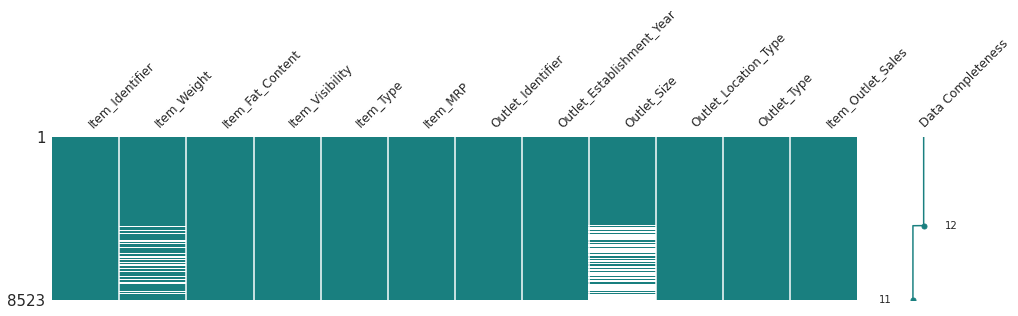

In [10]:
import missingno as miss
miss.matrix(df, figsize=(16,3), labels=True, fontsize=12, sort="descending", color=	(.10,.5,.50));


The missing values are located all over columns (outlet_size and item_weight). The two columns are of relevance to the prediction of sales, so rather than dropping the columns, it is wiser to fill the null values with thier median occuring value. This will be addressed during the preprocessing stage

#**Data cleaning process**

**Checking and fixing of inconsistency in columns with Object DataTypes.**

In [11]:
df['Item_Fat_Content']  = df['Item_Fat_Content'].str.capitalize()
df['Item_Fat_Content'].unique()

array(['Low fat', 'Regular', 'Lf', 'Reg'], dtype=object)

* **Replacing 'Lf' and 'Low Fat' with 'Low fat'**
* **Replacing 'Reg' with 'Regular'**




In [12]:
df['Item_Fat_Content'] = df['Item_Fat_Content'] .replace ({'Lf':'Low Fat','Low Fat':'Low fat', 'Reg': 'Regular'})
df['Item_Fat_Content'] = df['Item_Fat_Content'] .replace ({'Low Fat':'Low fat'})
df['Item_Fat_Content'].unique()

array(['Low fat', 'Regular'], dtype=object)

**Checking to confrim replacements**

In [13]:
df['Item_Fat_Content'].value_counts()

Low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Checking the "Item_Type" column**

In [14]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**Checking the Outlet_Identifier**

In [15]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

**Checking the Outlet_Establishment_Year column**

In [16]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

**Checking the Outlet_Size column**

In [17]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**Checking the Outlet_Location_Type**

In [18]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

**Checking the Outlet_Identifier column**

In [19]:
print(df['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


**Checking the Outlet_Type column**

In [20]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

**Confirming absence of duplicated enteries**

In [21]:
df.duplicated().any()

False

**Inspection of numeric column statistics**

In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



*   'Item_Weight':Statistics appears to be normal.
*  'Item_Visibility':There seems to be an extremity between the   minimum value of 0.000000 and a Maximum value of 0.328391.
*  Item_MRP':Normal statistics observed.
*   'Outlet_Establishment_Year' :Normal statistics observed.
*   'Item_Outlet_Sales' :Normal statisic observed.


# ***Data visualizaion report***

**Correlation amongst all data feautures**

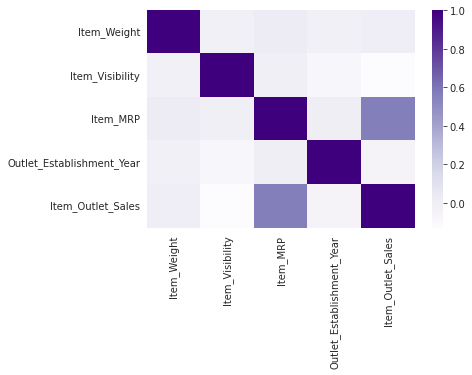

In [23]:
corr =df.corr()
sns.heatmap(corr, cmap ="Purples");

**The above heatmap shows the correlation coefficients between the features of the dataframe. The items in this dataframe have little to no correlation with each except for Item_MRP and Item_Outlet_Sales, these two have an average correlation relationship.**

**A pairplot visualization of correlation between features** 

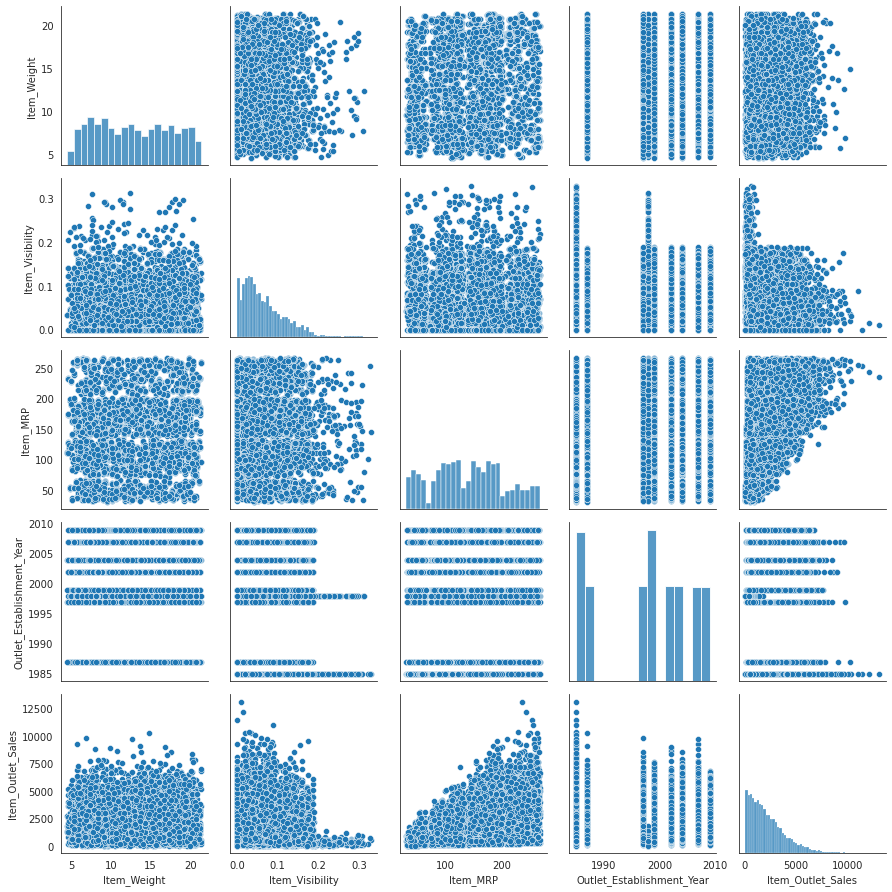

In [24]:
sns.pairplot(df);
plt.tight_layout()
plt.show;

**Graphcal display of Numeric Columns**

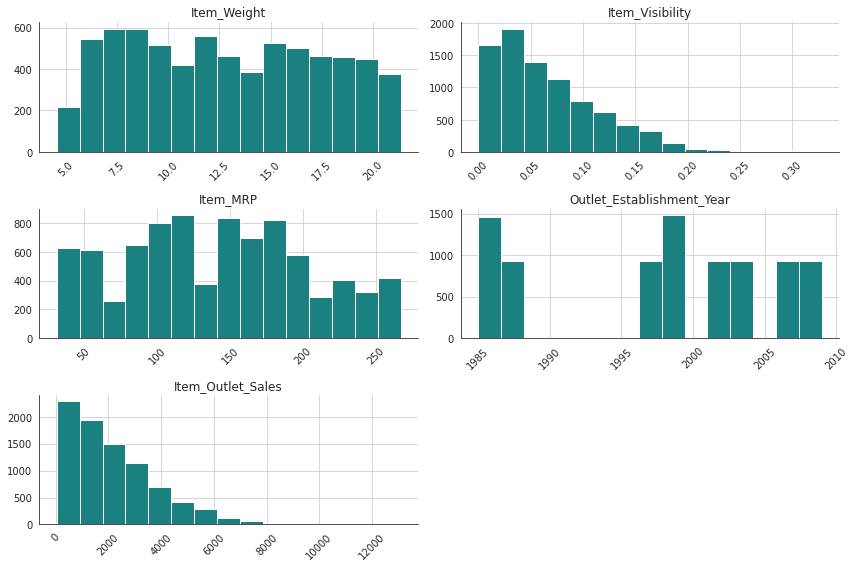

In [25]:
df.hist(figsize=(12,8), bins=15, xrot =45,color=	(.10,.5,.50))
plt.tight_layout()
sns.despine()
plt.show;



---
**Distribution of Item outlet sales** 


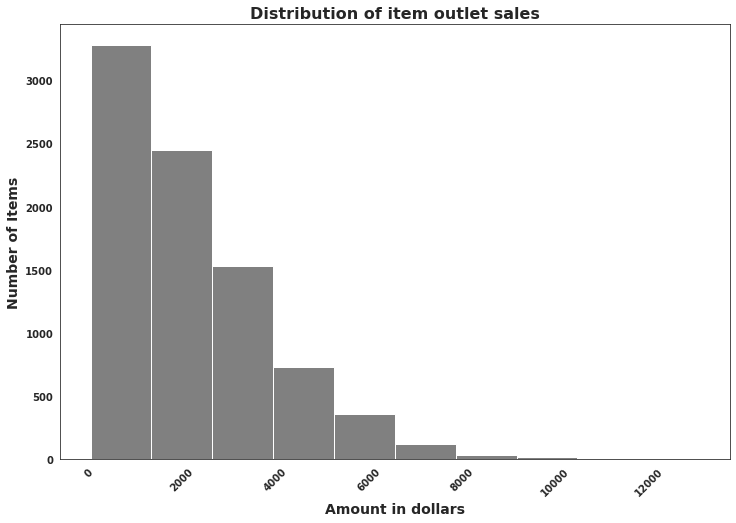

In [26]:
plt.figure(figsize=(12,8))
plt.hist(df['Item_Outlet_Sales'], color ="grey")
plt.title("Distribution of item outlet sales", fontsize= 16, weight="bold")
plt.xlabel('Amount in dollars', fontsize=14,weight ="bold")
plt.ylabel("Number of Items", fontsize=14,weight ="bold")
plt.xticks(weight="bold", rotation = 45)
plt.yticks(weight="bold");


The barplot above indicates that the lower the prices of items, the higher thier sales returns. This is only logical as the majority of people can afford the less expensive items, whereas only a few rich individuals can afford the very expensive items.

**Distribution of Item Visibility**

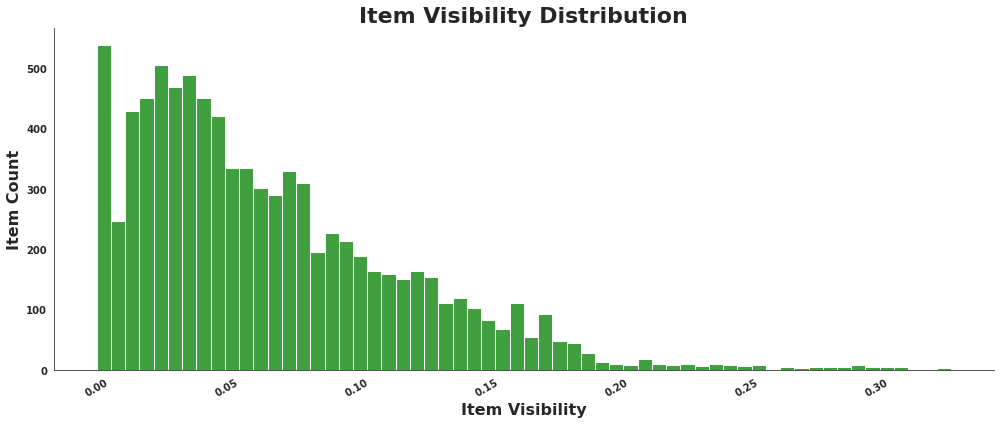

In [27]:
plt.figure(figsize = (14, 6))
sns.histplot(data=df, x='Item_Visibility', color='g', bins=60); 
plt.title('Item Visibility Distribution', fontsize = 22, weight='bold')
plt.xlabel('Item Visibility', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=30)
plt.yticks(fontsize = 10, weight='bold');
sns.despine();
plt.tight_layout()
plt.show;

#**Is there a relationship between Item Visibility and Outlet Sales?**


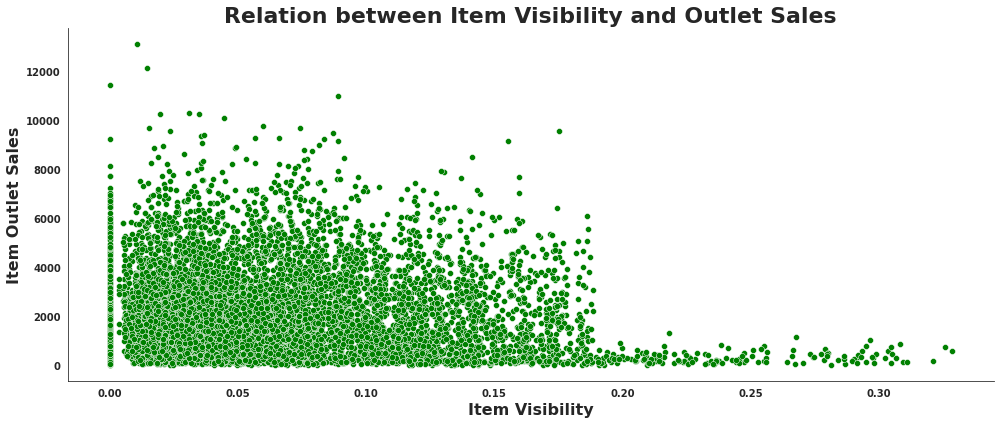

In [28]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data=df, x='Item_Visibility',y='Item_Outlet_Sales', color='g')
plt.title('Relation between Item Visibility and Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item Visibility', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
sns.despine()
plt.tight_layout()
plt.show;

It can be seem from both the histogram and scatterplot above that the items with lower visibility distribution have the highest sale returns. So in order to maximise sales of items, the item visibility across has to have a low figure.

#**What type of fat content do Customers prefer in products?**


---

**Distribution of fat content in products**






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


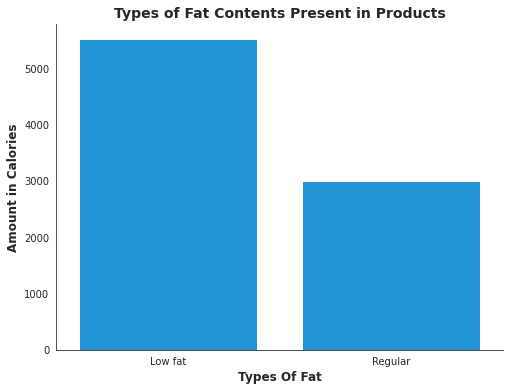

In [29]:
plt.figure(figsize = (8,6));
sns.countplot(df['Item_Fat_Content'],color='#069AF3')
plt.title("Types of Fat Contents Present in Products", fontsize=14, weight ="bold")
plt.xlabel('Types Of Fat', fontsize=12, weight="bold")
plt.ylabel("Amount in Calories",  fontsize=12, weight="bold")
sns.despine()


**Distribution of type of fat content based on sales.**

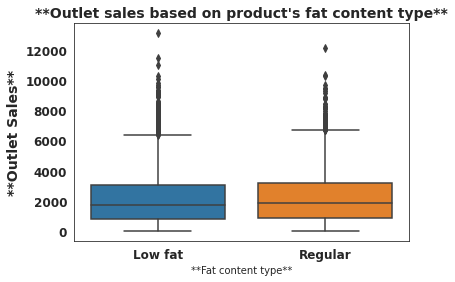

In [30]:
sns.boxplot(x="Item_Fat_Content" ,y= "Item_Outlet_Sales", data = df)
plt.title("**Outlet sales based on product's fat content type**", fontsize =14, weight ="bold")
plt.ylabel('**Outlet Sales**',fontsize =14, weight ="bold")
plt.xlabel("**Fat content type**")
plt.xticks(fontsize =12, weight ="bold")
plt.yticks(fontsize =12, weight ="bold")
plt.show;

The bar chart and boxplot above shows the distribution of the types fat content in products. We can see here that items containing low fat content  sell more than those with the regular type of fat content.

#**Which Item type sells the most in stores?**


---

**Distribution of different items being sold**


In [31]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

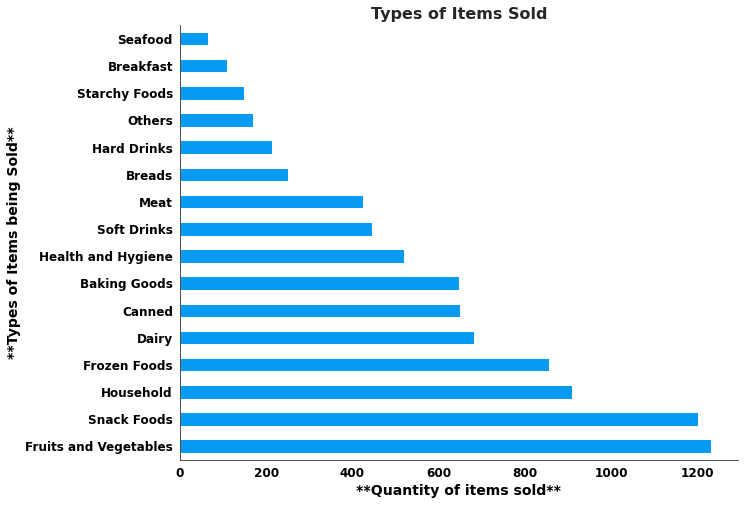

In [32]:
plt.figure(figsize=(10,8))
df['Item_Type'].value_counts().plot(kind = 'barh', color ="#069AF3")
plt.title('Types of Items Sold',fontsize = 16, weight ="bold")
plt.xticks( fontsize = 12, weight = "bold", color="k")
plt.yticks(fontsize = 12, weight ="bold", color="k")
plt.ylabel("**Types of Items being Sold**", weight = "bold", fontsize ="14", color="k")
plt.xlabel("**Quantity of items sold**", weight="bold", fontsize="14", color="k")
sns.despine()
plt.show()


The bar chart above shows the different types of items being sold. We can see here that fruits and vegetables have the higest sale returns, followed by snack foods and household items. Breakfast and seafood items have the least sales return.

#**Does the Outlet size matter when it comes to sales?**


---

**Distribution of Sales based on outlet size**

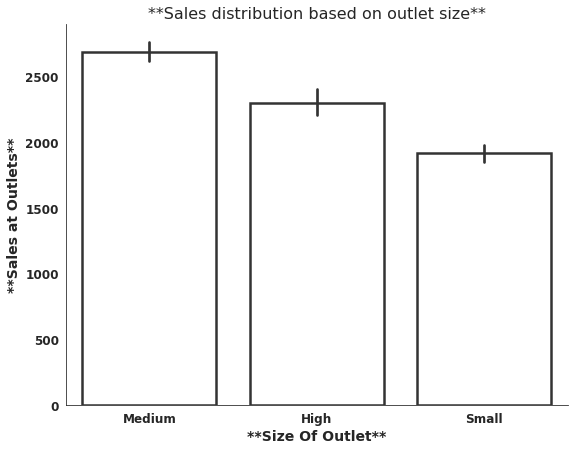

In [33]:
plt.figure(figsize =(9,7))
sns.barplot(x ="Outlet_Size", y = "Item_Outlet_Sales", data = df, linewidth=2.5, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2")
plt.title('**Sales distribution based on outlet size**', fontsize = 16)
plt.xlabel("**Size Of Outlet**", fontsize = 14, weight="bold")
plt.ylabel("**Sales at Outlets**", fontsize =14, weight ="bold")
plt.xticks(fontsize=12, weight ="bold")
plt.yticks(fontsize=12, weight="bold")
sns.despine()
plt.show()

The chart above shows the different sizes of sales outlets and thier sales returns. We can see here that medium sized outlets make the highest number of sales as compared to other types.

#**What about the outlet type? Does it have an impact on the sales?**



---
**Distribution of the various outlet types**



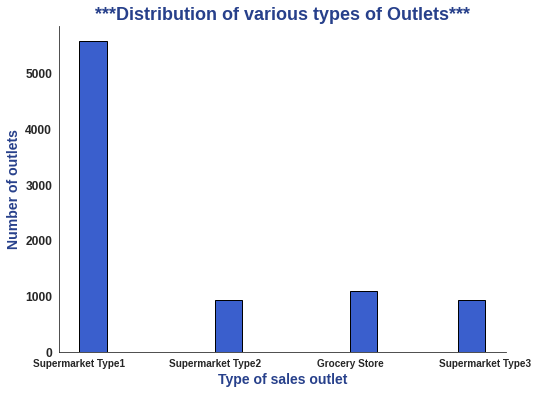

In [34]:
sns.set_style("white")
plt.figure(figsize=(8,6))
df["Outlet_Type"].hist(bins =15,color ='#3A5FCD', edgecolor = 'black', grid = False)
plt.style.use('seaborn')
plt.title("***Distribution of various types of Outlets***", fontsize =18,weight ="bold", color="#27408B")
plt.ylabel("Number of outlets", fontsize =14, weight ="bold", color="#27408B")
plt.xlabel("Type of sales outlet",fontsize =14, weight ="bold", color="#27408B")
plt.xticks(fontsize =10, weight ="bold")
plt.yticks(fontsize =12, weight ="bold")
sns.despine()
plt.show()


**The above chart clearly shows that there are more of supermarket type1 in numbers as compaired to all other type of outlets.But does this imply higher sales in supermarket Type 1? The below bar chart says otherwise.**


---
**Distribution of sales based on outlet types**


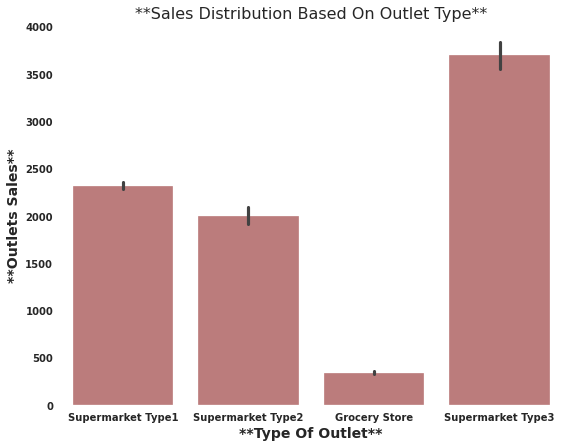

In [35]:
sns.set_style("white")
plt.figure(figsize =(9,7))
sns.barplot(x="Outlet_Type", y = "Item_Outlet_Sales", data=df, color ="#C67171")
plt.title('**Sales Distribution Based On Outlet Type**', fontsize = 16)
plt.xlabel("**Type Of Outlet**", fontsize = 14, weight="bold")
plt.ylabel("**Outlets Sales**", fontsize =14, weight ="bold")
plt.xticks(fontsize=10, weight ="bold")
plt.yticks(fontsize=10, weight="bold")
sns.despine()
plt.show()

**So We can see here thateven though Supermarket Type 1 has the highest number of outlets, It doesnt have the highest sales return. Supermarket type 3 has the highest sales returns than any other type of outlet, while grocery stores makes the least sales**

#**Does the outlet location type also affect sales?**


---

**Distribution of sales based on the outlet location type**

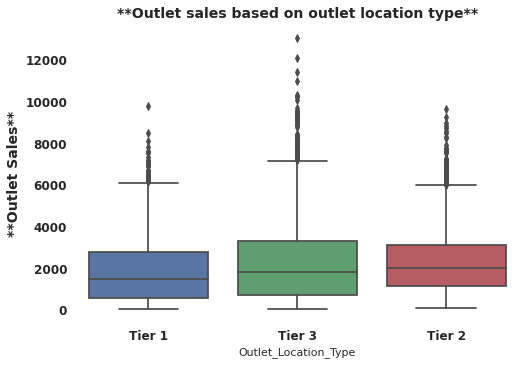

In [36]:
sns.set_style("white")
sns.boxplot(x="Outlet_Location_Type" ,y= "Item_Outlet_Sales", data = df)
plt.title("**Outlet sales based on outlet location type**", fontsize =14, weight ="bold")
plt.ylabel('**Outlet Sales**',fontsize =14, weight ="bold")
plt.xticks(fontsize =12, weight ="bold")
plt.yticks(fontsize =12, weight ="bold")
plt.show;

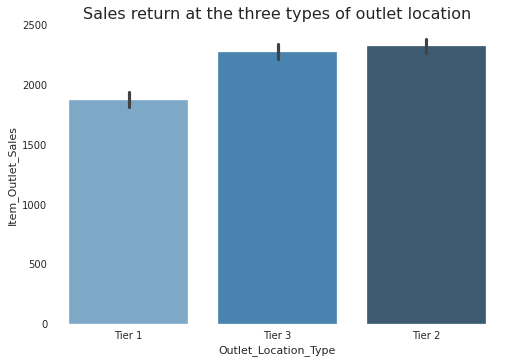

In [37]:
ax = sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df,
                 palette="Blues_d")
plt.title("Sales return at the three types of outlet location", fontsize = 16)
plt.show();


**We can see from the above boxplot and barchart that sales outlets located at the tier 3 and 2 type of location have higher sales than that of tier1**

#**Is there a relation between the Item outlet sales and the Item MRP(maximum retail price)?**



---
**Correlation between Item_Outlet_Sales and Item_MRP**



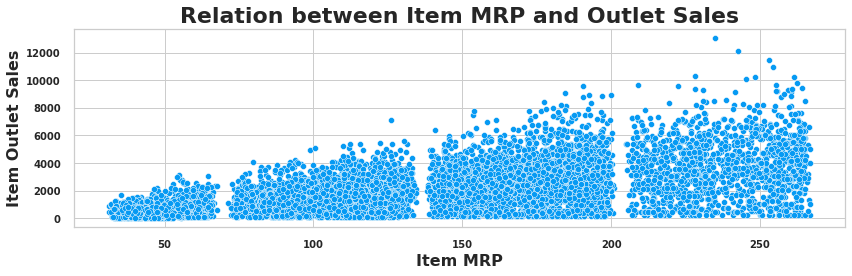

In [38]:
plt.figure(figsize = (12, 4))
sns.set_theme(style = "whitegrid")
sns.scatterplot(data=df, x='Item_MRP',y='Item_Outlet_Sales', color='#069AF3')
plt.title('Relation between Item MRP and Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Item MRP', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

The Regplot above, indicates that there is a positive correlation between the Item_MRP and the Item_Outlet_Sales. The higher the Item_MRP, the higher the outlet sales.

#**SUMMARY 
---


**The above charts have depicted that in order to obtain maximum sales return, the following criteria should be met :**

*  **The store should be a medium sized.**
*  **It should be located in a Tier 3 type of location.**
*  **There shoud be a concentration on Fruits, vegetables and household items.** 
*  **Concentrate more on products with low fat content than those with regular fat contents.**
*  **Maintain a very low percent of Item Visibility.**

# **MODEL BUILDING PROCESS.**

**Ordinal Encoding**

In [39]:
#Encoding the values in outlet location type column in preparation for modelling.
df["Outlet_Location_Type"].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [40]:
replacement_dict1 = {"Tier 1":0, "Tier 2":1, "Tier 3":2} 

In [41]:
df["Outlet_Location_Type"] = df["Outlet_Location_Type"].replace(replacement_dict1)
df["Outlet_Location_Type"].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [42]:
#Encoding the values in outlet size column in preparation for modelling.
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [43]:
replacement_dict2 = {"Small":0, "Medium":1,"High":2}

In [44]:
df["Outlet_Size"] = df["Outlet_Size"].replace(replacement_dict2)
df["Outlet_Size"].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

#**Validation Split**

In [45]:
#Defining the independent features(X) and the target vector(y) 
X = df.drop(columns = ["Item_Outlet_Sales", 'Outlet_Identifier'])
y = df["Item_Outlet_Sales"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

#**Instantiating Column Selectors**

In [47]:
#Categorical and numerical column selection.
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

**Instantiating Transformers**

In [48]:
#Filling in the null values with the use of SimpleImputer.
freq_imputer = SimpleImputer(strategy ="most_frequent")
mean_imputer = SimpleImputer(strategy ="mean")

In [49]:
#Scaling and OneHotEncoding of numeric and categorical columns respectively.
scale =StandardScaler()
ohe =OneHotEncoder(handle_unknown ="ignore", sparse=False)

**Instantiating Pipelines**

In [50]:
#Creating the pipeline numerical values.
num_pipe =make_pipeline(mean_imputer, scale)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [51]:
#Creating the pipeline for categorical values
cat_pipe =make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

**Instantiating column transformers**

In [52]:
#Creating the tuples to house the pipelines and the column selectors.
num_tuple =(num_pipe, num_selector)
cat_tuple =(cat_pipe, cat_selector)

**Column transformation**

In [53]:
#Transforming the columns using the make_column_transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder ="passthrough")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44f3ae0c10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44f3ae0550>)])

In [54]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44f3ae0c10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44f3ae0550>)])

In [55]:
X_train_processed =preprocessor.transform(X_train)
X_test_processed =preprocessor.transform(X_test)

**Result Inspection**

In [56]:
print(np.isnan(X_train_processed).sum().sum(), "missing values in training data")
print(np.isnan(X_test_processed).sum().sum(), "missing values in testing data")
print("\n")
print("All data in X_train processed are", X_train_processed.dtype)
print("All data in X_test processed are", X_test_processed.dtype)
print("\n")
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train processed are float64
All data in X_test processed are float64




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [57]:
X_train = pd.DataFrame(X_train_processed)
X_test = pd.DataFrame(X_test_processed)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577
0,0.817249,-0.712775,1.828109,1.327849,0.407785,1.084948,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.407785,1.084948,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.136187,0.407785,-1.384777,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.732018,-1.291630,-0.149914,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.493686,0.000000,-0.149914,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577
0,3.310089e-01,-0.776646,-0.998816,-1.293807,2.107200,1.084948,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.179892e+00,0.100317,-1.585194,-0.102145,-1.291630,-1.384777,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.784469e-01,-0.482994,-1.595784,0.136187,0.407785,-1.384777,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.213344e-16,-0.415440,0.506592,-1.532139,0.407785,1.084948,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-6.426567e-01,-1.047426,0.886725,0.732018,-1.291630,-0.149914,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
#X_train_df.info()

# **BUILDING OF MODEL**

**lets begin by creating a function that will take as an input the true and predicted values, then provide the output as the R^2, MAE, MSE and RMSE metrices which will be used in evaluating our model(s).**

In [60]:
#Defining a function to return the metrices.
def eval_model (true, pred):
  r2 = r2_score(true, pred)
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  print(f' r2:   {r2:,.2f}\n mae:  {mae:,.2f} \n mse:  {mse:,.2f} \n rmse: {rmse:,.2f}\n\n')
#print (f'r2 score: {r2} mae score: {mae} mse score : {mse} The rmse score: {rmse}')

**Evaluation Metrices (Explanation)**

R^2 (Coefficient of Determination)

The default metric for evaluating a regression model is R^2, the coefficient of determination. The best possible score for R^2 is 1.0, and the higher the R^2 the better. R^2 is given as a decimal, but is usually interpreted as a percent. For example, an R^2 of 0.9 can be interpreted as: 90% of the variance in y can be explained by the variance in X. (90% of the variation in our Target can be explained by the features of our model).

#**DUMMY REGRESSION MODEL**
**This is just a baseline model to compare with the values of our model.**

**Instantiating the Baseline Model**

In [61]:
#Instantiating the baseline
dummy = DummyRegressor(strategy ="mean")
#Fitting the pipeline on the train set.
dummy.fit(X_train, y_train)


DummyRegressor()

**Predictions**

In [62]:
#Initiating predictions
dummy_train_pred = dummy.predict(X_train)
dummy_test_pred = dummy.predict(X_test)

**Model Evaluation**

In [63]:
#Evaluation of Dummy model
print("Training scores for the Baseline model(Dummy Regressor)")
Train_evaluation = eval_model(y_train, dummy_train_pred)
print("Testing scores for the Baseline model(DummyRegressor)")
Test_evaluation = eval_model(y_test, dummy_test_pred)

Training scores for the Baseline model(Dummy Regressor)
 r2:   0.00
 mae:  1,360.22 
 mse:  2,959,455.70 
 rmse: 1,720.31


Testing scores for the Baseline model(DummyRegressor)
 r2:   -0.00
 mae:  1,326.12 
 mse:  2,772,144.46 
 rmse: 1,664.98




#**LINEAR REGRESSION MODEL**

**Instantiating the linear regression Model**

In [64]:
#Instantiating and fitting model on training set
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

**Predictions**

In [65]:
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

**Model evaluation**

In [66]:
print('Train Set Evaluation Metric')
Train_evaluation = eval_model(y_train, train_preds)
print('Test Set Evaluation Metric')
Test_evaluation = eval_model(y_test, test_preds)

Train Set Evaluation Metric
 r2:   0.67
 mae:  736.16 
 mse:  974,169.33 
 rmse: 987.00


Test Set Evaluation Metric
 r2:   -323,400,935,618,519,936.00
 mae:  39,427,913,882.83 
 mse:  892,255,836,226,918,652,313,600.00 
 rmse: 944,592,947,373.06




#**DECISION TREE REGRESSION MODEL**

The parameters of a decision tree can be adjusted to get better results. so lets tune the parameter values to get the best parameter with the use of a function.

In [67]:
#Tuning the parameters for optimal values.

#Creating a function to obtain the highest r2 value
max_depth_range = list(range(1,10))
r2_test = []
r2_train =[]
for depth in max_depth_range :
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train,y_train)
  score_test = dec_tree.score(X_test,y_test)
  score_train = dec_tree.score(X_train,y_train)
  r2_test.append(score_test)
  r2_train.append(score_train)
  R2_dec_tree =pd.DataFrame({"Test" : r2_test, "Train": r2_train})

In [68]:
R2_dec_tree.head()

,Test,Train
0,0.229683,0.237797
1,0.433778,0.431641
2,0.524222,0.524218
3,0.583937,0.582705
4,0.596056,0.604207


**Graphical view of best max_depth**

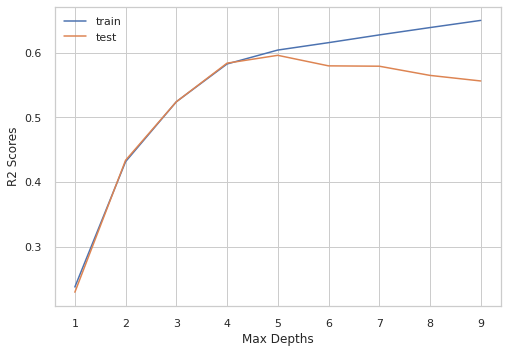

In [69]:
#plot the scores to visually determine the best max_depth
plt.plot(max_depth_range,R2_dec_tree['Train'], label='train')
plt.plot(max_depth_range,R2_dec_tree['Test'], label='test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [70]:
# The graph above shows that the max_depth of 5, yeilds the highest r2 value.


**Instantiating the decision tree model**

In [71]:
dec_tree = DecisionTreeRegressor(max_depth =5, random_state = 42)
dec_tree.fit(X_test, y_test)
print(f'The depth of the above tree is:',dec_tree.get_depth(),'and it has ',dec_tree.get_n_leaves(),'number of leaves')

The depth of the above tree is: 5 and it has  28 number of leaves


**Predictions**

In [72]:
dec_train_preds = dec_tree.predict(X_train)
dec_test_preds = dec_tree.predict(X_test)

**Evaluation.**

In [73]:
print('Train Set Evaluation Metric')
Train_evaluation = eval_model(y_train, dec_train_preds)
print('Test Set Evaluation Metric')
Test_evaluation = eval_model(y_test, dec_test_preds)


Train Set Evaluation Metric
 r2:   0.57
 mae:  789.96 
 mse:  1,263,475.39 
 rmse: 1,124.04


Test Set Evaluation Metric
 r2:   0.63
 mae:  699.97 
 mse:  1,026,713.49 
 rmse: 1,013.27




#**BAGGED TREES REGRESSION MODEL**

**Instantiating the Baseline Model**

In [74]:
bagreg = BaggingRegressor(random_state=42)
bagreg.fit(X_train, y_train)
#bagreg.get_params()


BaggingRegressor(random_state=42)

**Predictions**

In [75]:
bagreg_train_preds = bagreg.predict(X_train)
bagreg_test_preds = bagreg.predict(X_test)

**Evaluation**

In [76]:
print('Train Set Evaluation Metric')
Train_evaluation = eval_model(y_train,bagreg_train_preds)
print('Test Set Evaluation Metric')
Test_evaluation = eval_model(y_test,bagreg_test_preds)


Train Set Evaluation Metric
 r2:   0.92
 mae:  316.67 
 mse:  238,671.91 
 rmse: 488.54


Test Set Evaluation Metric
 r2:   0.51
 mae:  806.66 
 mse:  1,349,664.40 
 rmse: 1,161.75




#**RANDOM FOREST REGRESSION MODEL**

**The parameters of a Random tree can be adjusted to get better results. so lets tune the parameter values(max_depth, n_estimators) to get the best parameter with the use of a function.**

**Max_depth**

In [77]:
#Tuning the parameters for optimal results.
#Creating a function to obtain the highest r2 value
max_depth_range = list(range(2,6))
rf_test = []
rf_train =[]
for depth in max_depth_range :
  rf_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  rf_tree.fit(X_train,y_train)
  score_test = rf_tree.score(X_test,y_test)
  score_train = rf_tree.score(X_train,y_train)
  rf_test.append(score_test)
  rf_train.append(score_train)
  R2_rf_tree =pd.DataFrame({"Test" : rf_test, "Train": rf_train})

**Graphical view of best max_depth**

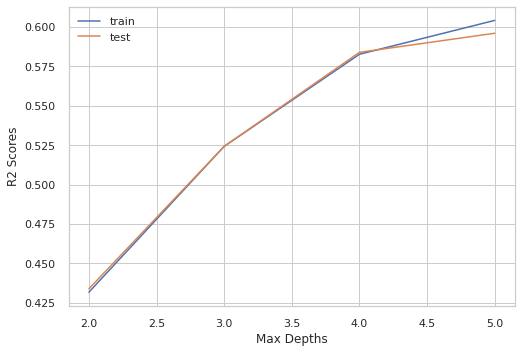

In [78]:
#plot the scores to visually determine the best max_depth
plt.plot(max_depth_range,R2_rf_tree['Train'], label='train')
plt.plot(max_depth_range,R2_rf_tree['Test'], label='test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()
#The grapth below shows 5 to be the best max_depth.

**n_estimators**

In [ ]:
#Creating a function to return the optimal n_estimator value.
n_estimators_range =list(range(140,150))
X =[]
for estimator in n_estimators_range:
  Rf_tree =RandomForestRegressor(n_estimators = estimator, random_state = 42)
  Rf_tree.fit(X_train, y_train)
  score =Rf_tree.score(X_test, y_test)
  X.append(score)

**Graphical view of the best n_estimator value** 

In [ ]:
#The graph below shows 135, as the optimal value of n_estimators.
plt.plot(n_estimators_range, X)
plt.xlabel('n estimator')
plt.ylabel('r2_scores');

**Instantiating the Random Forest Regression model**

In [ ]:
#Instantiating using the max_depth as 4 and n_estimator as 141.
rf = RandomForestRegressor(max_depth=4,n_estimators=142 ,random_state = 42)
#rf.get_params()
rf.fit(X_train, y_train)


**Prediction**

In [ ]:
#Prediction of independent features(X)
rf_train_preds =rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

**Evaluation**

In [ ]:
print('Train Set Evaluation Metric')
Train_evaluation = eval_model(y_train,rf_train_preds)
print('Test Set Evaluation Metric')
Test_evaluation = eval_model(y_test,rf_test_preds)

**The output gotten from the random forest regression model appears to be the best values, in comparism with the outputs gotten from the other models**